In [115]:
import pandas as pd

df = pd.read_csv('/Users/adamhunter/Documents/renewablydocs/eva followups/waste followups/UM Dumpster Fullness April 1-5.csv')


## combining all the location categories into a single column which is the dumpster name

In [116]:
df['dumpster_name'] = df['University Rentals\n'].fillna('') + df['Academic Buildings '].fillna('') + df['Auxiliaries '].fillna('') + df['South Campus Apartments '].fillna('') + df['Residence Halls'].fillna('') + df['Missoula College'].fillna('') + df['Lubrecht Forest'].fillna('')
df = df.drop(['University Rentals\n', 'Academic Buildings ', 'Auxiliaries ', 'South Campus Apartments ', 'Residence Halls', 'Missoula College', 'Lubrecht Forest'], axis=1)

In [117]:
df.columns

Index(['Timestamp', 'Type of Bin ', 'Location Type', 'How Full is it? ',
       'Presence of Recycling? ', 'Presence of Composting? ',
       'Reusable materials? ', 'Other thoughts or comments', 'dumpster_name'],
      dtype='object')

## Mapping 'How Full is it? ' to fullness number, i.e. 1/2 full = .5 etc.

In [118]:
df['fullness'] = df['How Full is it? '].map({
    '1/2 full': 0.5, 
    'Full': 1, 
    '3/4 full': 0.75, 
    '1/4 full': 0.25, 
    'overfilled (items over the top)': 1.25, 
    'Empty': 0
})


## Plotting average fullness for each dumpster, things under red line are questionable, average fullness at audit is under 50%

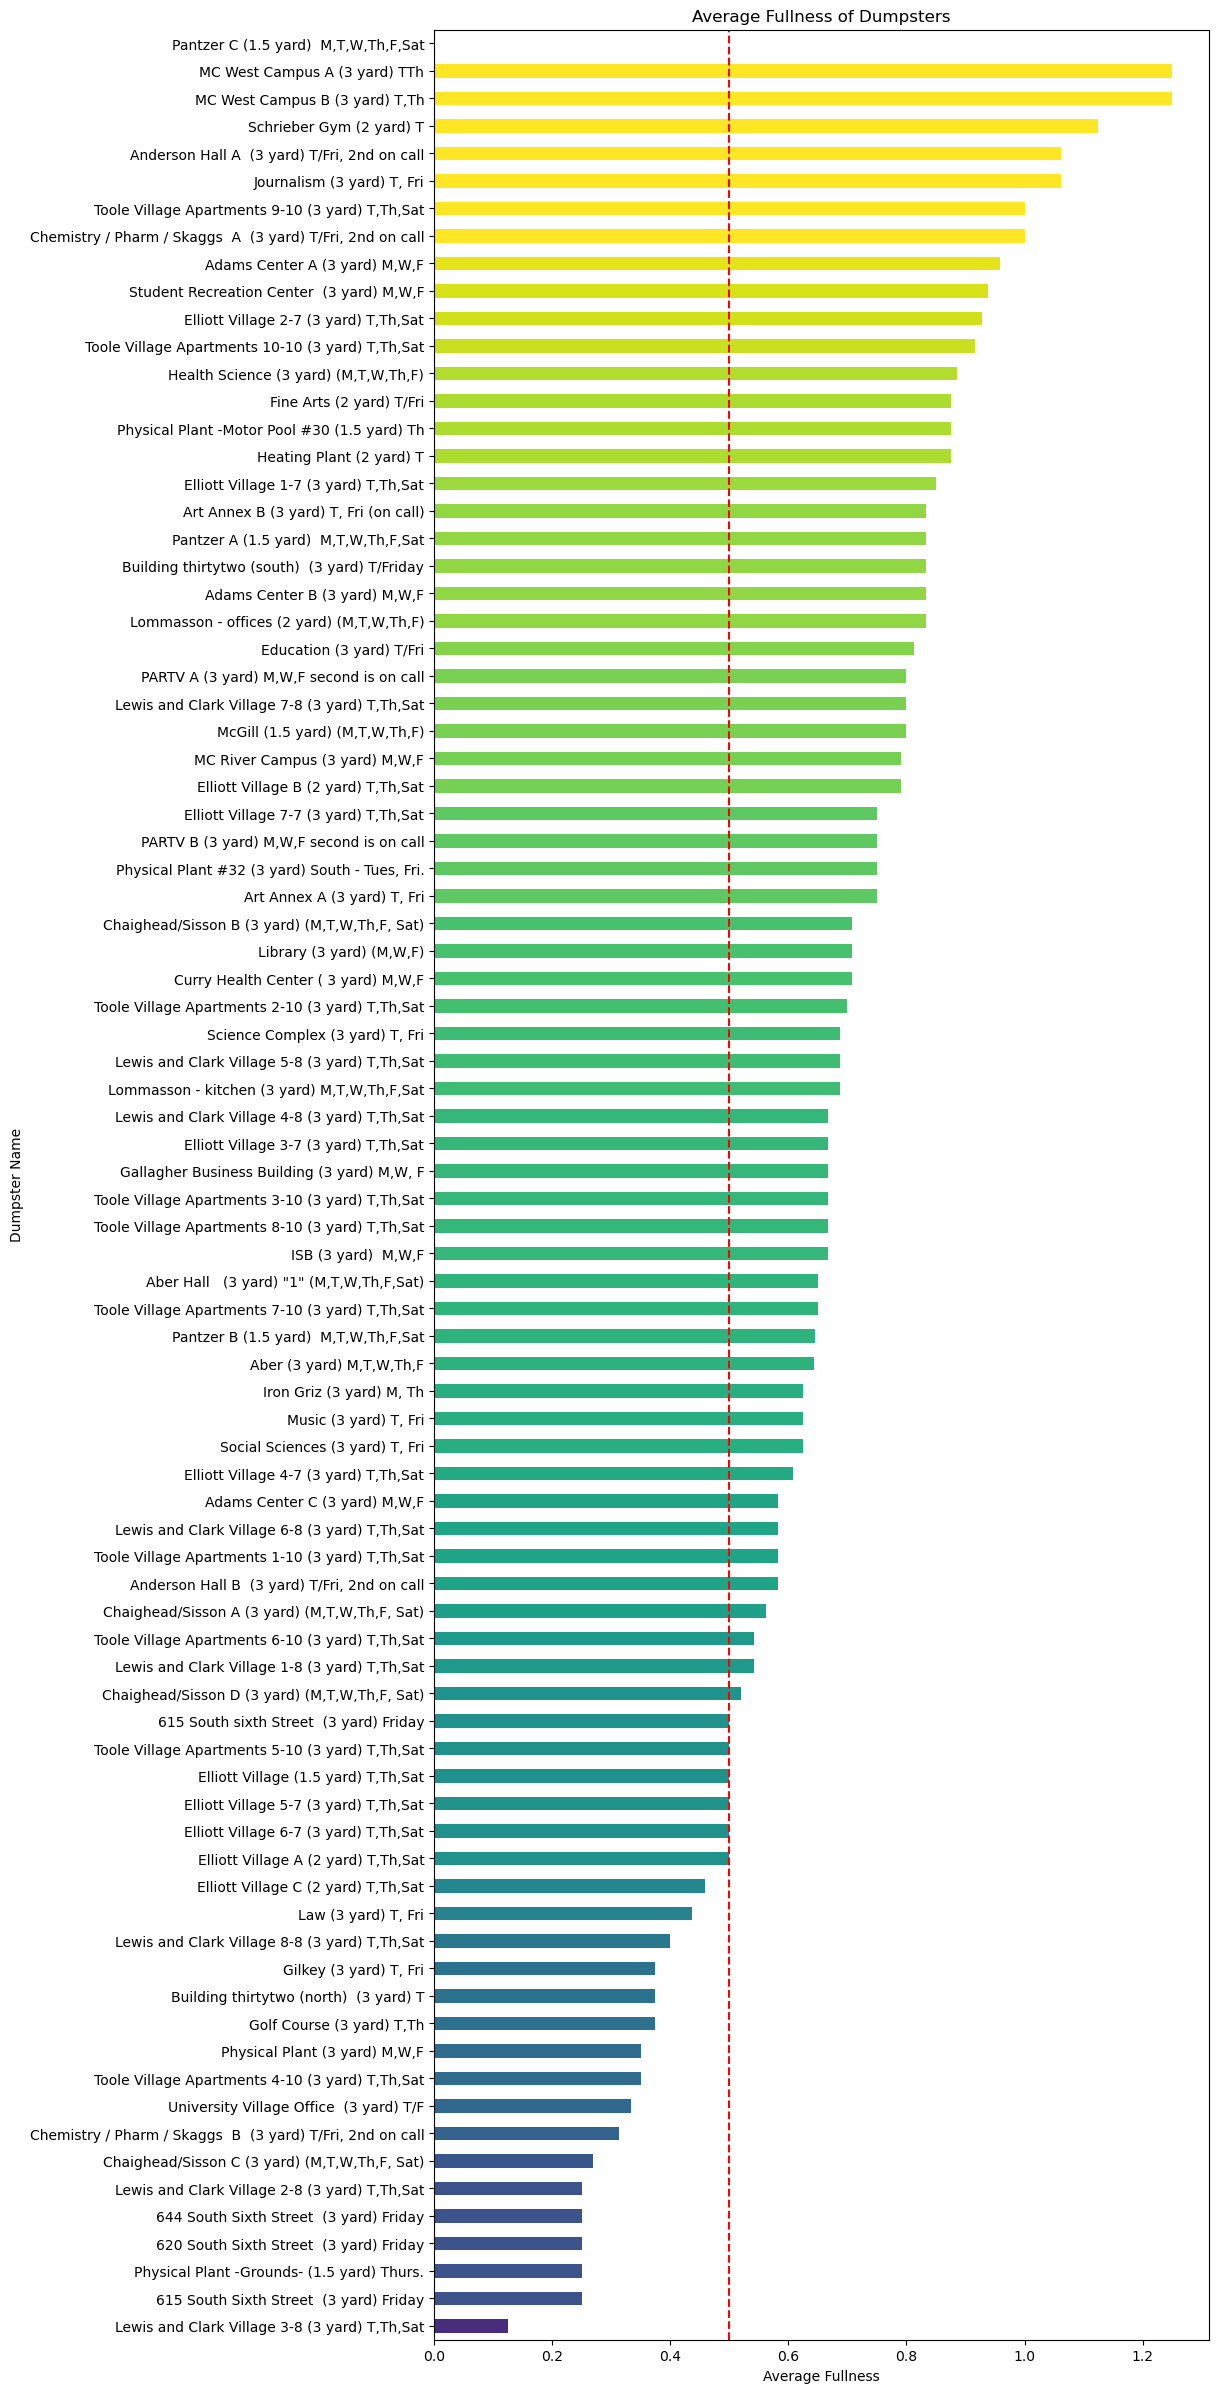

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the data
bar_plot = df.groupby('dumpster_name')['fullness'].mean().sort_values().plot(kind='barh', figsize=(10,30), color=plt.cm.viridis(df.groupby('dumpster_name')['fullness'].mean().sort_values()))
plt.title('Average Fullness of Dumpsters')
plt.xlabel('Average Fullness')
plt.ylabel('Dumpster Name')
plt.axvline(x=0.5, color='r', linestyle='--')  # Add vertical red line for .5
plt.show()


In [120]:
df['Location Type'].value_counts()

Location Type
South Campus Apts.    220
Academic Buildings    129
Auxillaries            58
Residence Halls        39
Missoula College        8
University Rentals      4
Name: count, dtype: int64

In [121]:
df['short_name'] = df['dumpster_name'].str.lstrip('0123456789 ')

df['short_name'] = df['short_name'].str.extract(r'^(.*?)(?=\d|[^\w\s])')
# Regex to remove a standalone uppercase letter at the end or surrounded by spaces
df['short_name'] = df['short_name'].str.replace(r'\s([A-Z])\s?$', '', regex=True)
df['short_name'] = df['short_name'].str.replace(r'\s([A-Z])\s', ' ', regex=True)
df['short_name'] = df['short_name'].str.strip()

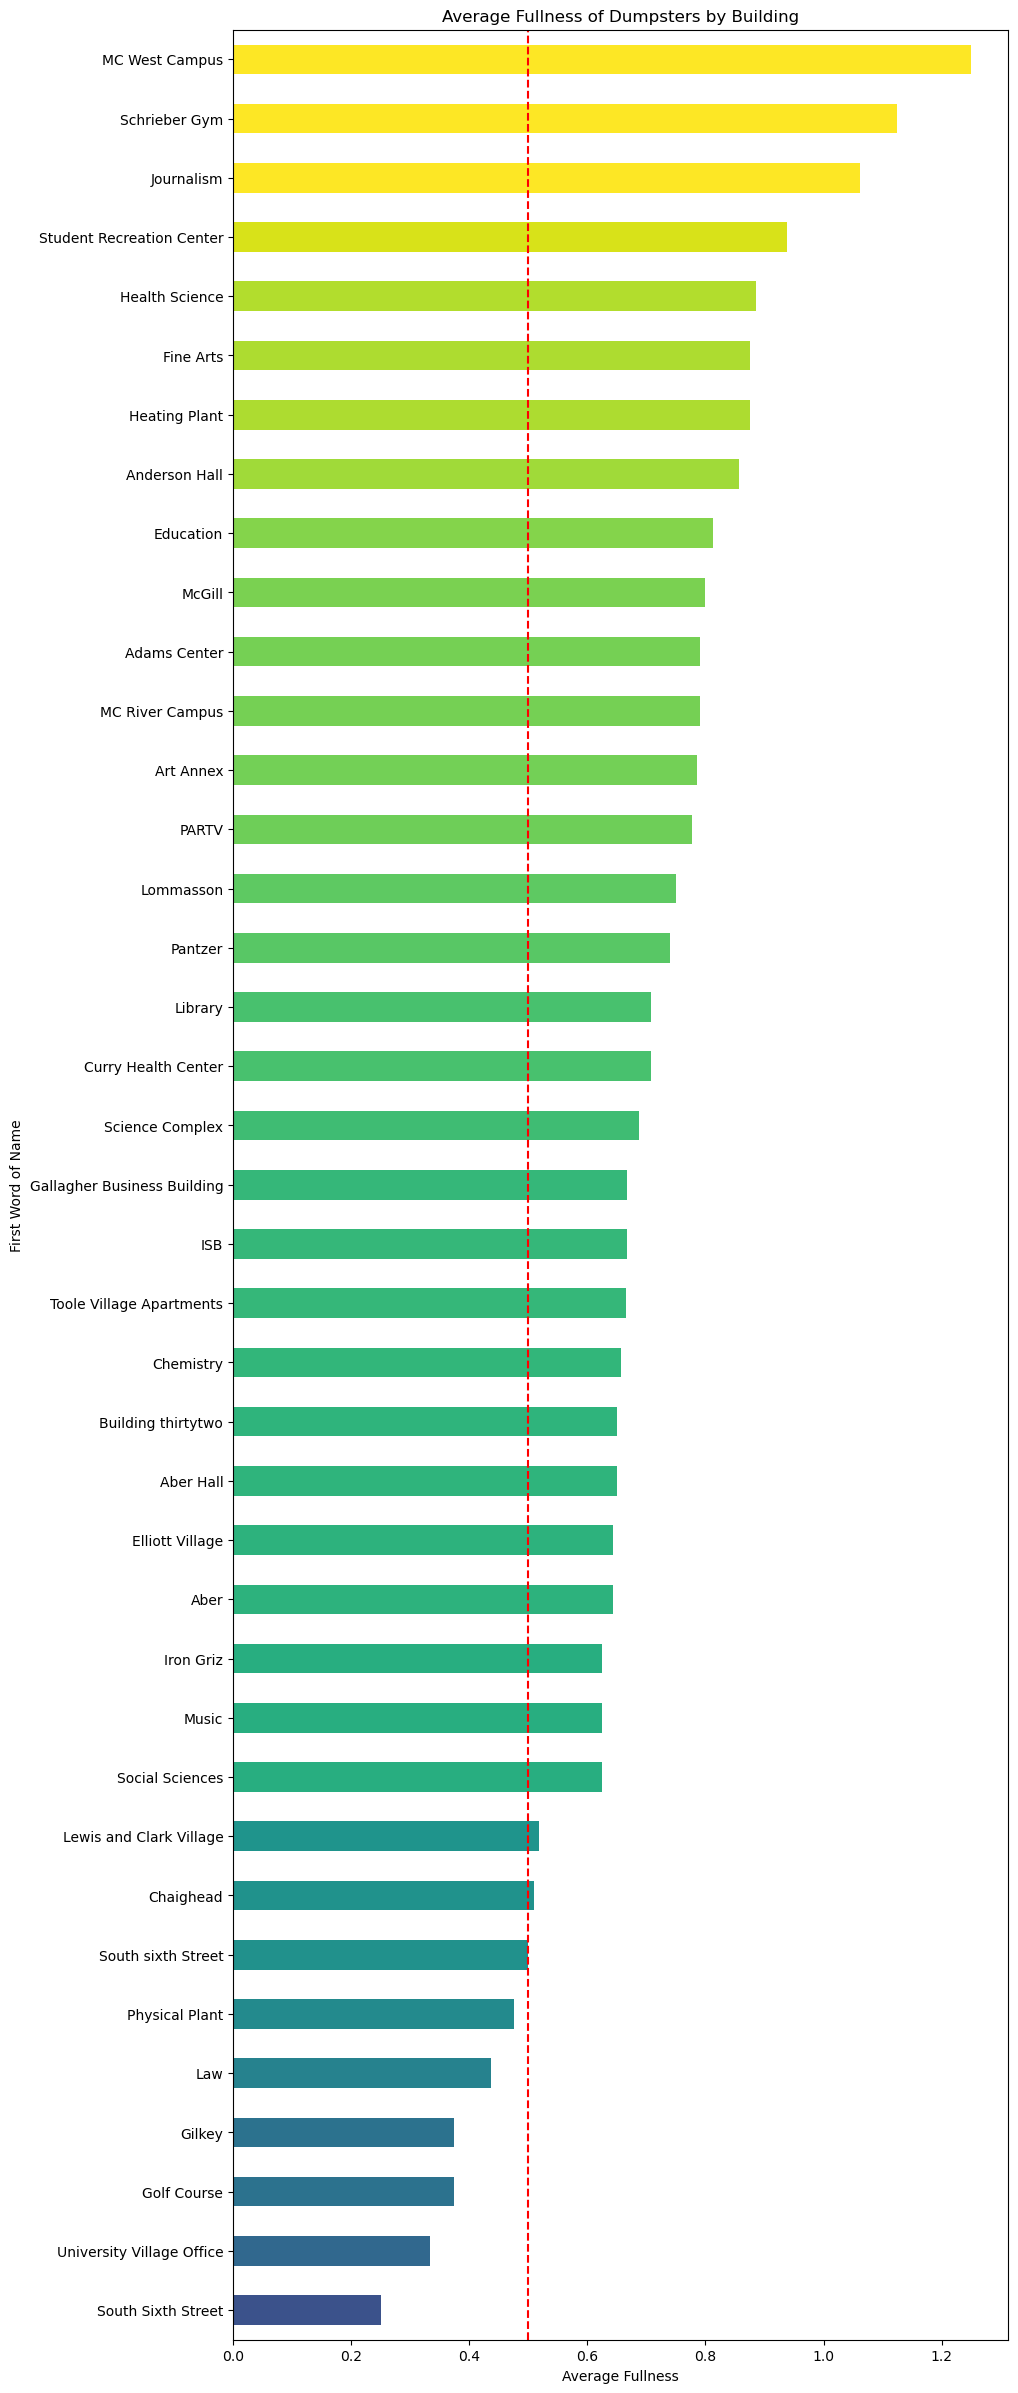

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the data with color
bar_plot = df.groupby('short_name')['fullness'].mean().sort_values().plot(kind='barh', figsize=(10,30), color=plt.cm.viridis(df.groupby('short_name')['fullness'].mean().sort_values()))
plt.title('Average Fullness of Dumpsters by Building')
plt.xlabel('Average Fullness')
plt.ylabel('First Word of Name')
plt.axvline(x=0.5, color='r', linestyle='--')  # Add vertical red line for .5
plt.show()


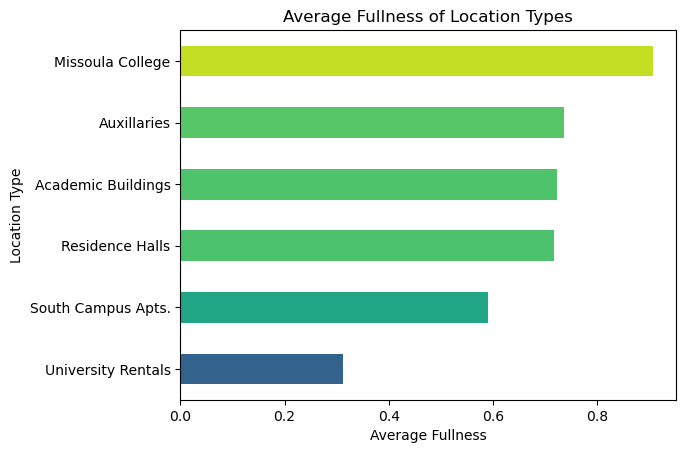

In [123]:
df.groupby('Location Type')['fullness'].mean().sort_values().plot(kind='barh', color=plt.cm.viridis(df.groupby('Location Type')['fullness'].mean().sort_values()))
plt.title('Average Fullness of Location Types')
plt.xlabel('Average Fullness')
plt.ylabel('Location Type')
plt.show()


## Looking at frequency of less than half full, things that pass the red line are questionable

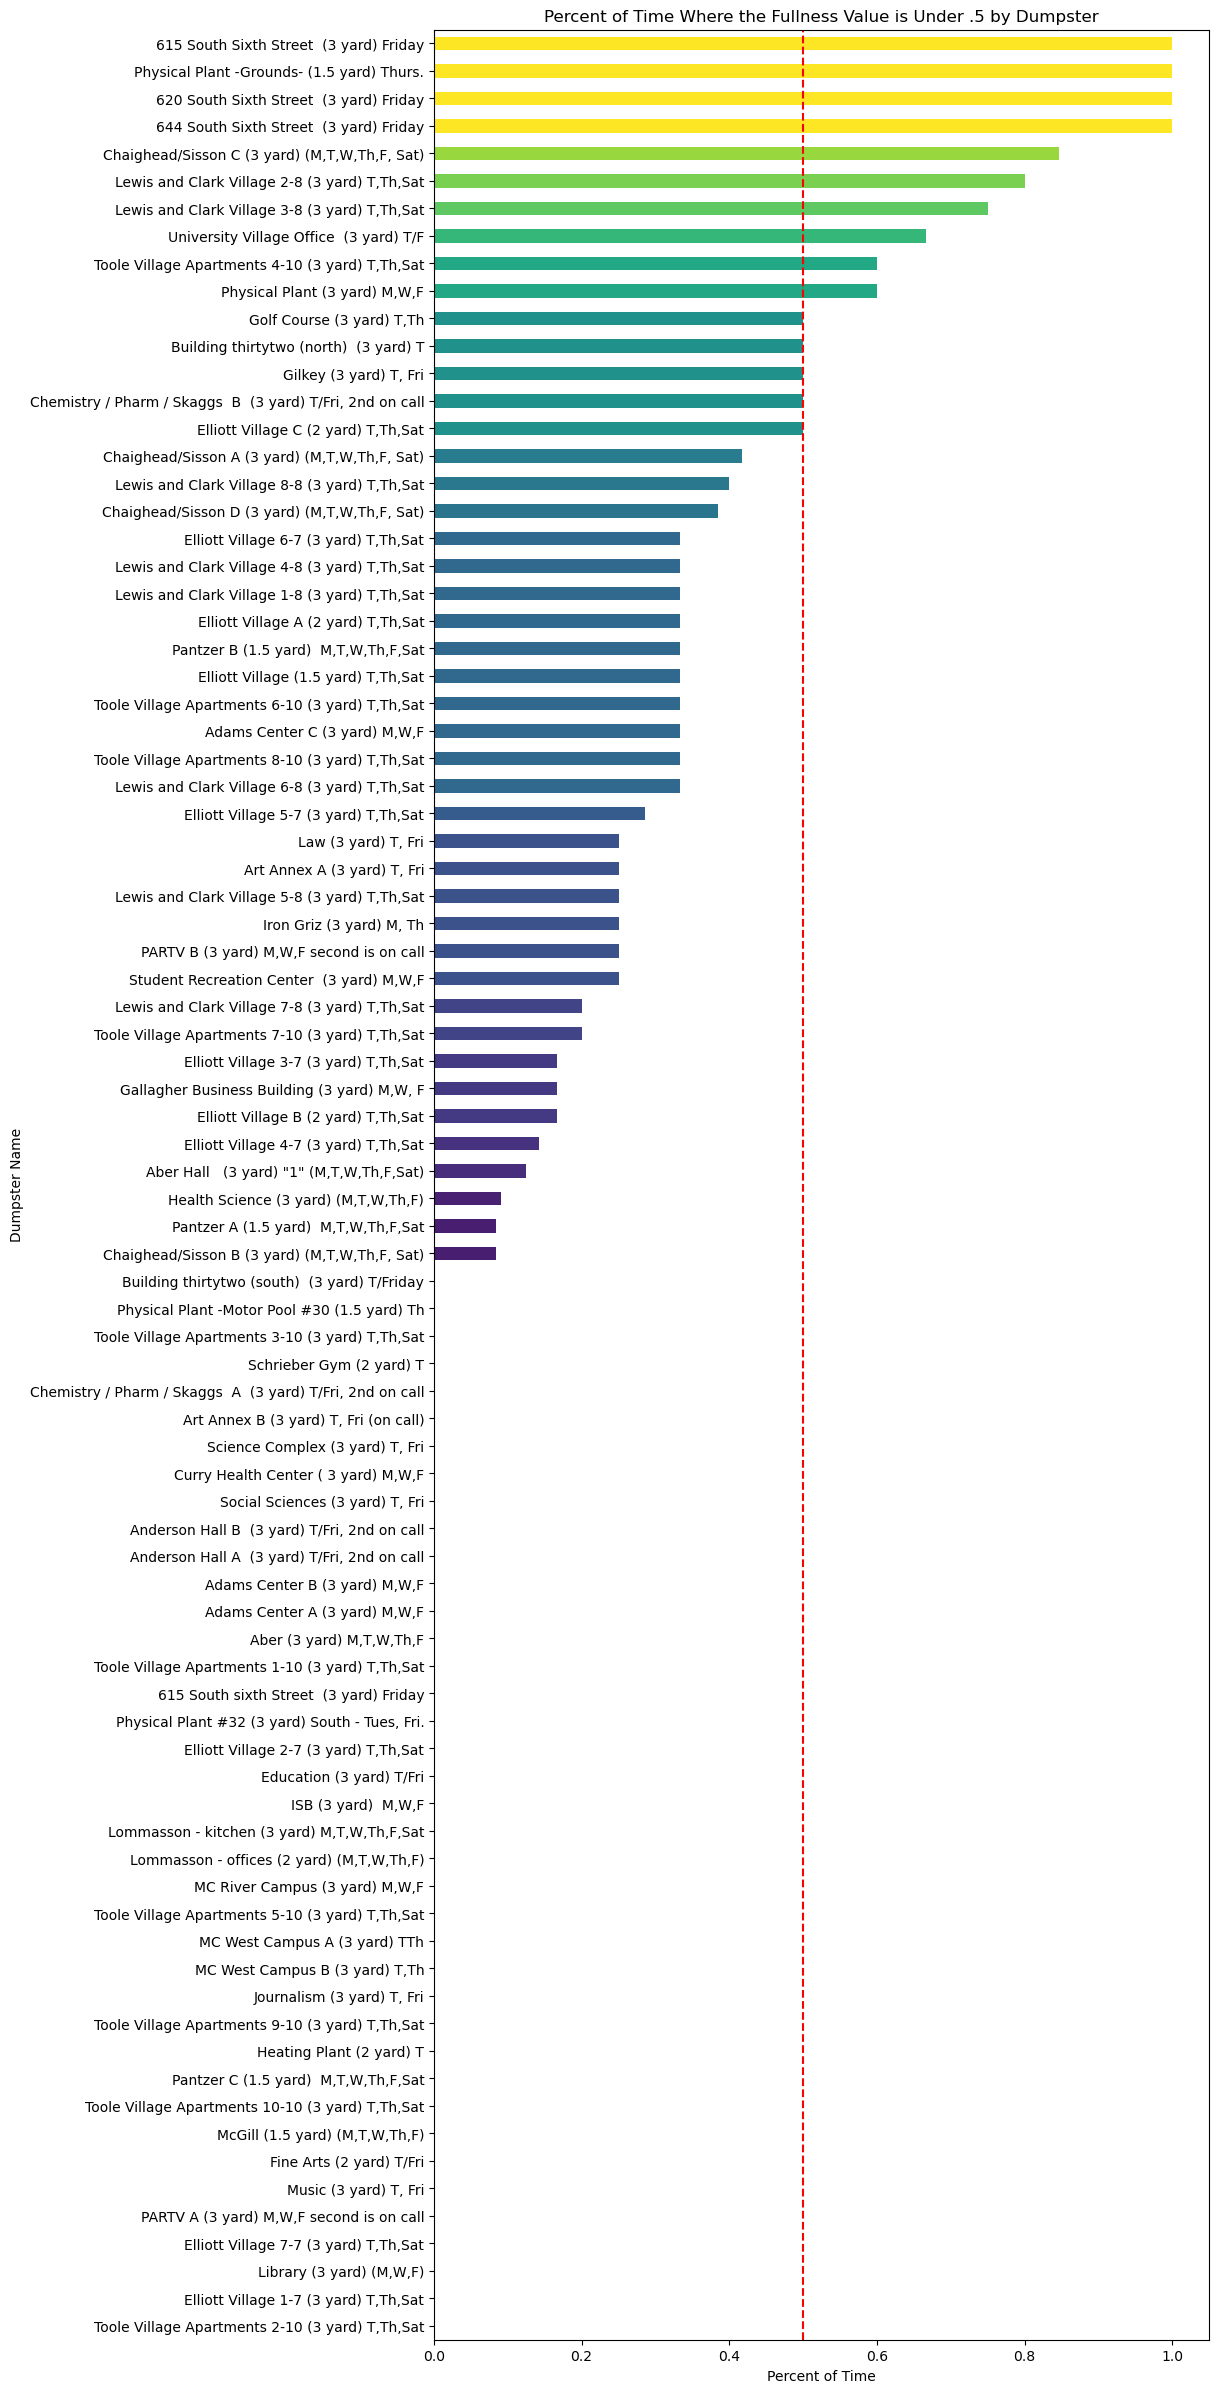

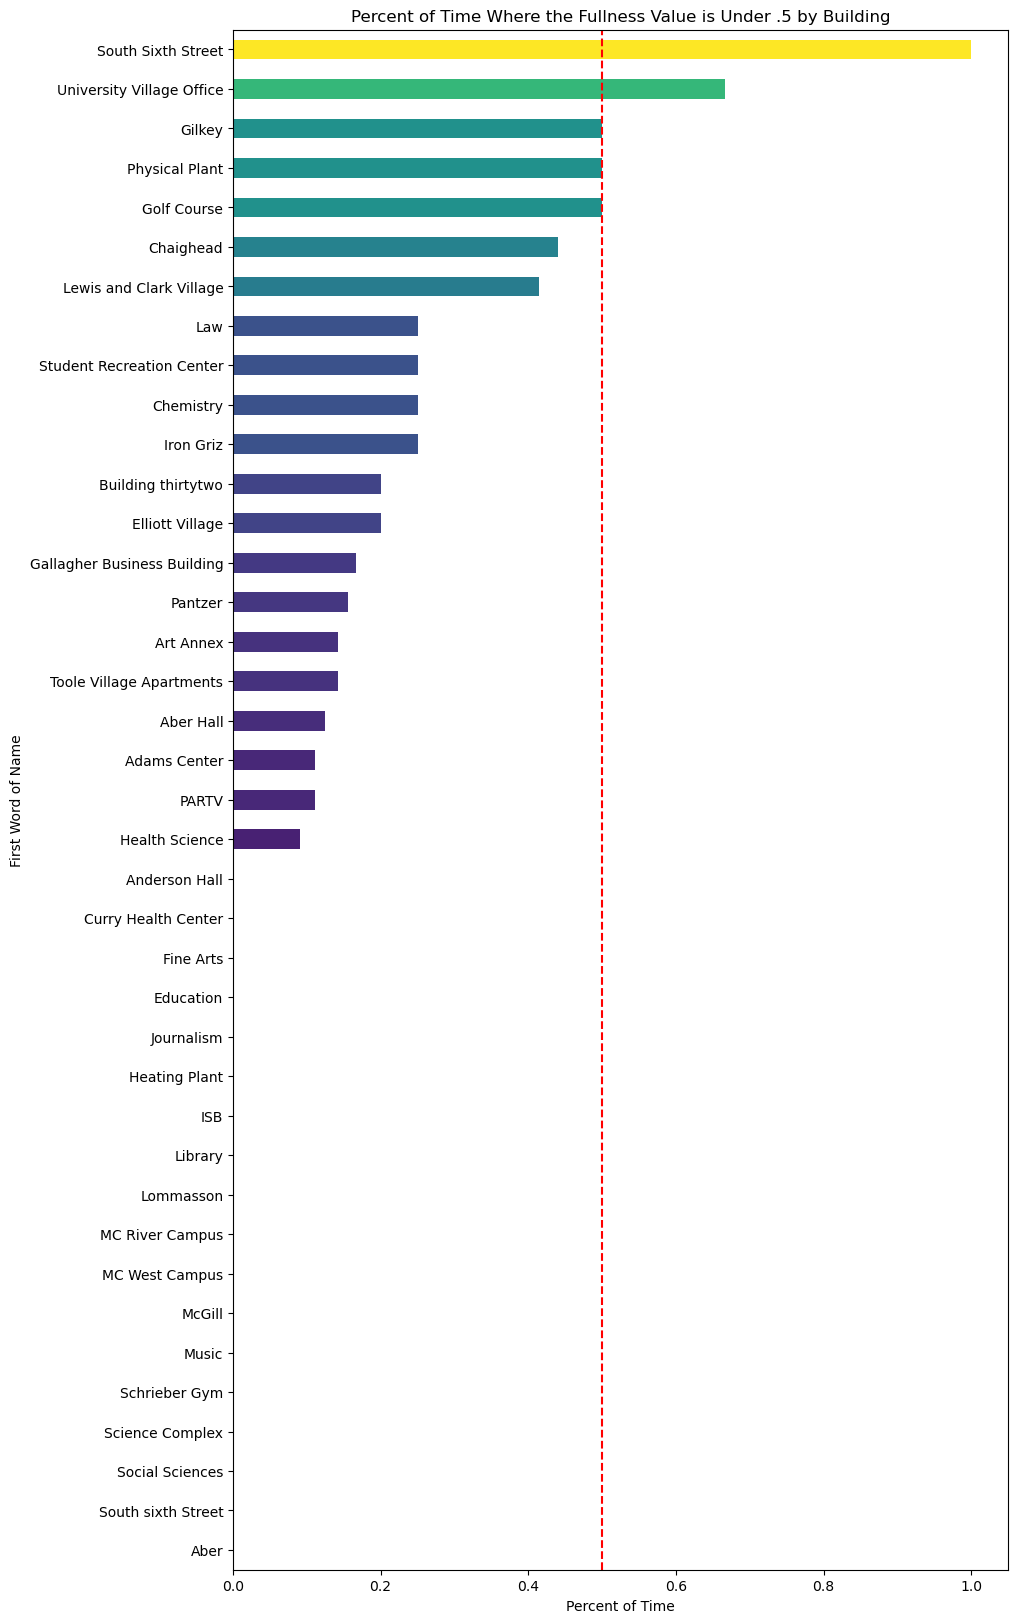

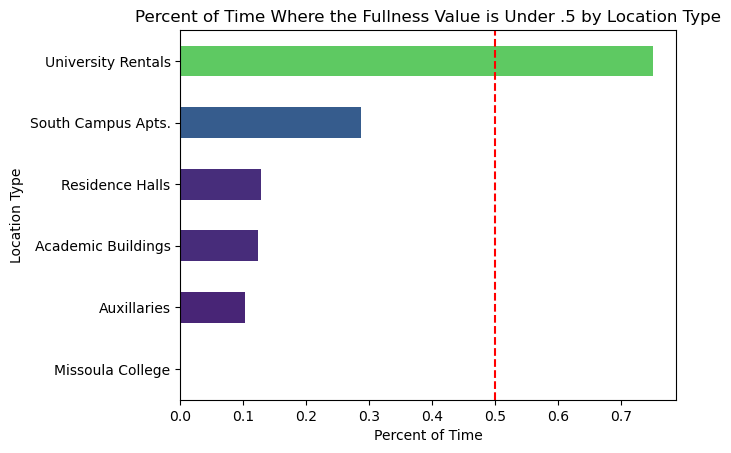

In [124]:
df['fullness'] = df['fullness'].apply(lambda x: 1 if x < 0.5 else 0)
df.groupby('dumpster_name')['fullness'].mean().sort_values().plot(kind='barh', figsize=(10,30), color=plt.cm.viridis(df.groupby('dumpster_name')['fullness'].mean().sort_values()))
plt.title('Percent of Time Where the Fullness Value is Under .5 by Dumpster')
plt.xlabel('Percent of Time')
plt.ylabel('Dumpster Name')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()

df.groupby('short_name')['fullness'].mean().sort_values().plot(kind='barh', figsize=(10,20), color=plt.cm.viridis(df.groupby('short_name')['fullness'].mean().sort_values()))
plt.title('Percent of Time Where the Fullness Value is Under .5 by Building')
plt.xlabel('Percent of Time')
plt.ylabel('First Word of Name')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()

df.groupby('Location Type')['fullness'].mean().sort_values().plot(kind='barh', color=plt.cm.viridis(df.groupby('Location Type')['fullness'].mean().sort_values()))
plt.title('Percent of Time Where the Fullness Value is Under .5 by Location Type')
plt.xlabel('Percent of Time')
plt.ylabel('Location Type')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()




## Creating a 'waste mix score' per dumpster, +1 for each instance of something found in dumpster thats not supposed to be there

In [125]:
df['Presence of Recycling? '] = df['Presence of Recycling? '].astype(str).apply(lambda x: 0 if 'don\'t' in x.lower() else 1)
df['Presence of Composting? '] = df['Presence of Composting? '].astype(str).apply(lambda x: 0 if 'don\'t' in x.lower() else 1)
df['Reusable materials? '] = df['Reusable materials? '].astype(str).apply(lambda x: 0 if 'don\'t' in x.lower() else 1)
df['waste_mix'] = df['Presence of Recycling? '] + df['Presence of Composting? '] + df['Reusable materials? ']


## Scores from 0 - 3.
## 3 means every time the dumpster is checked all three things were found

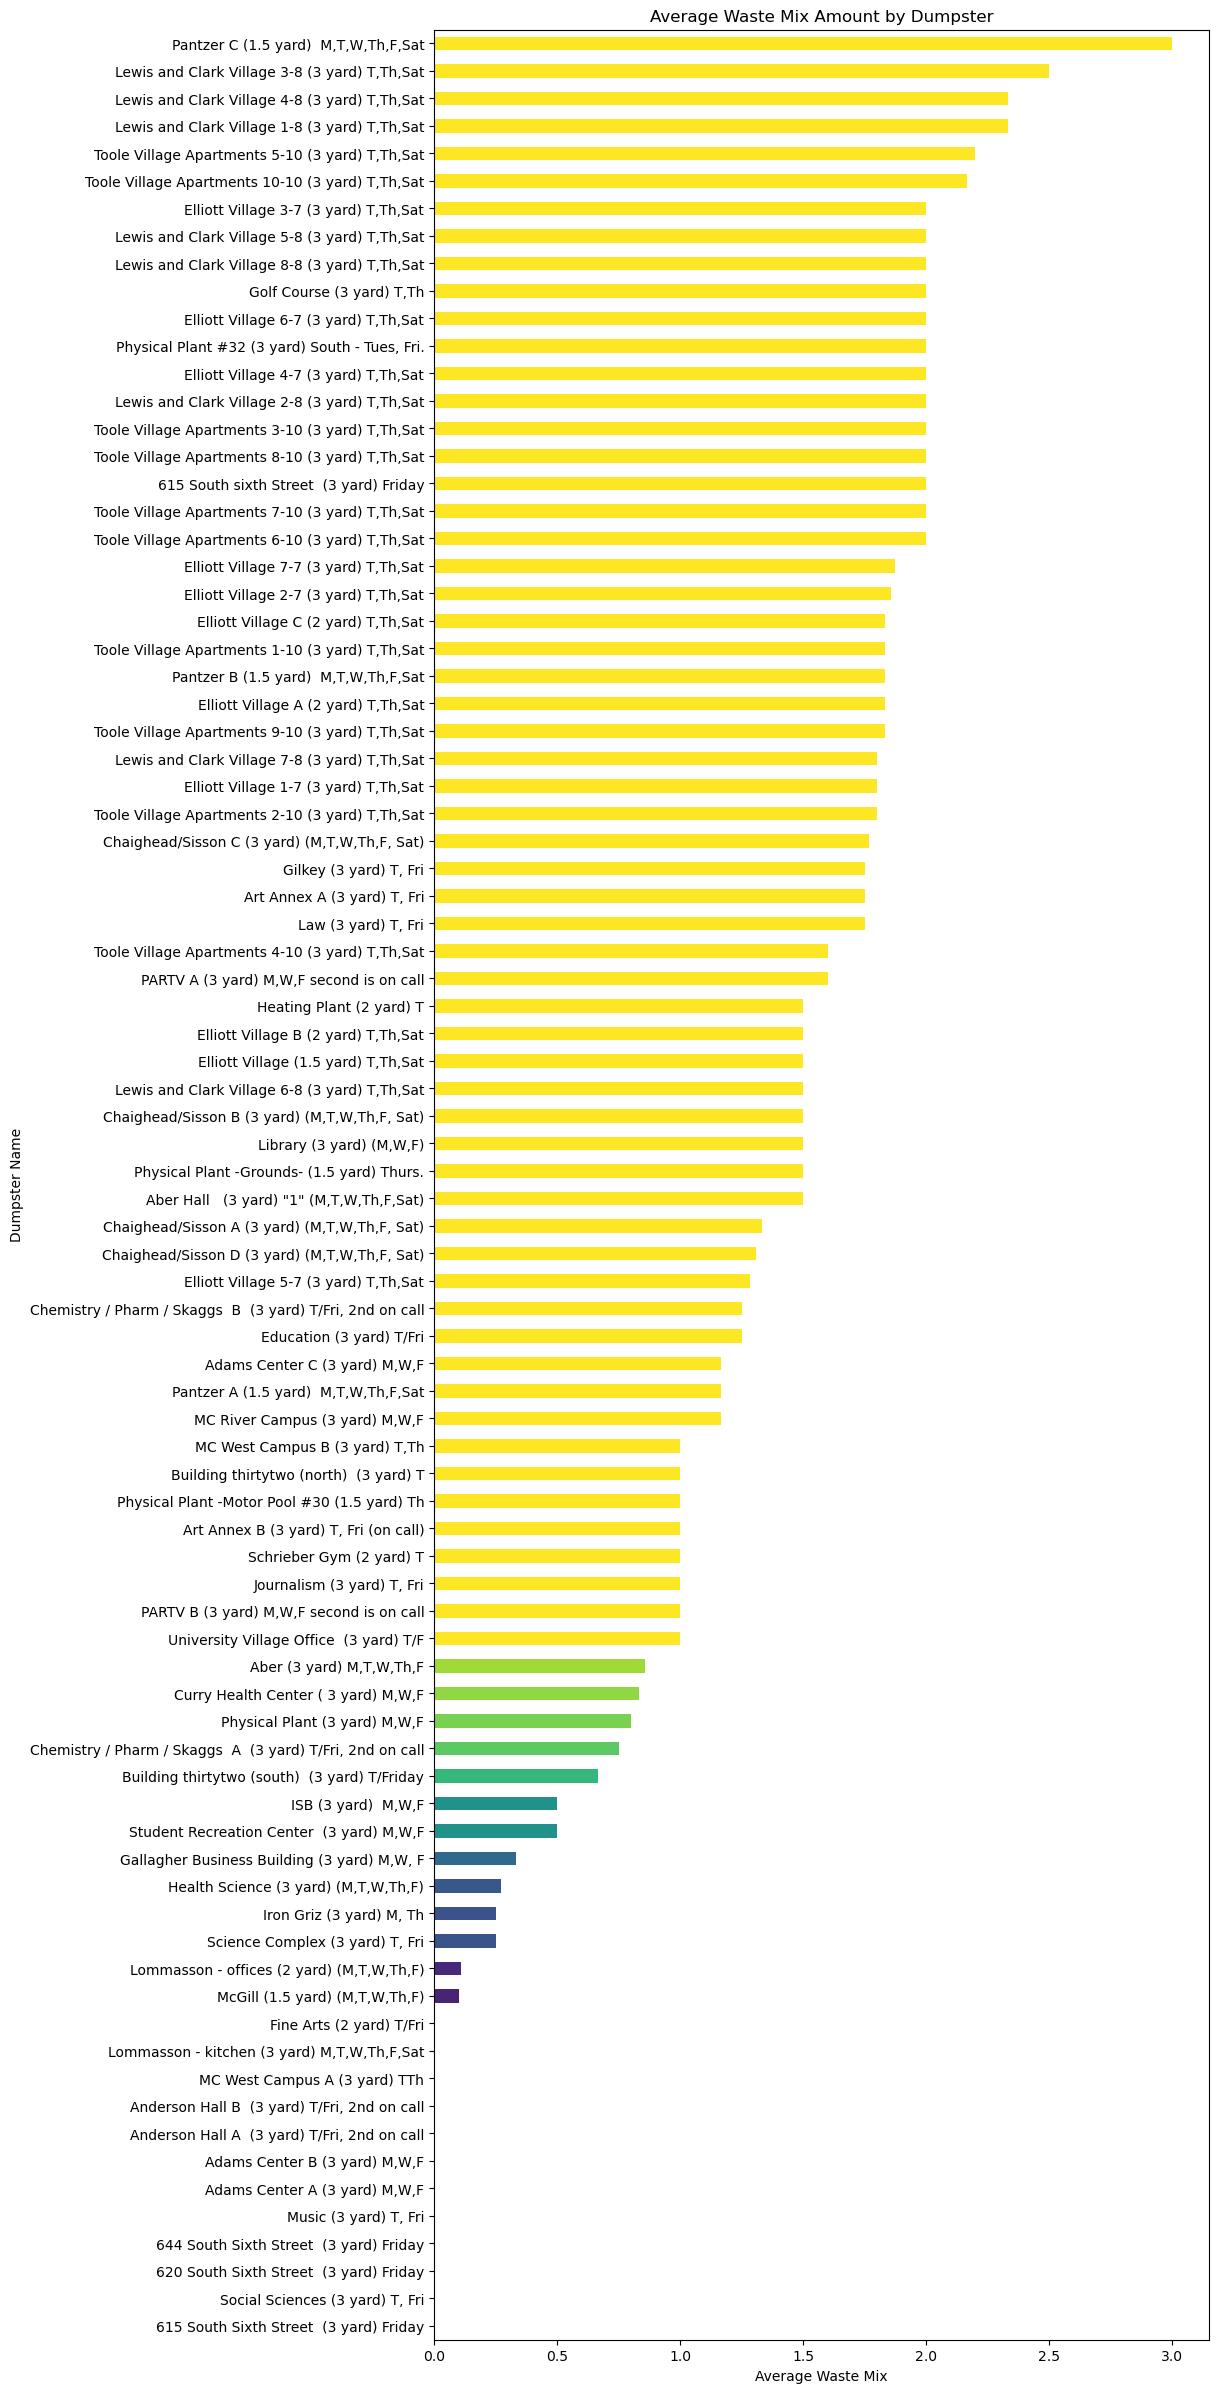

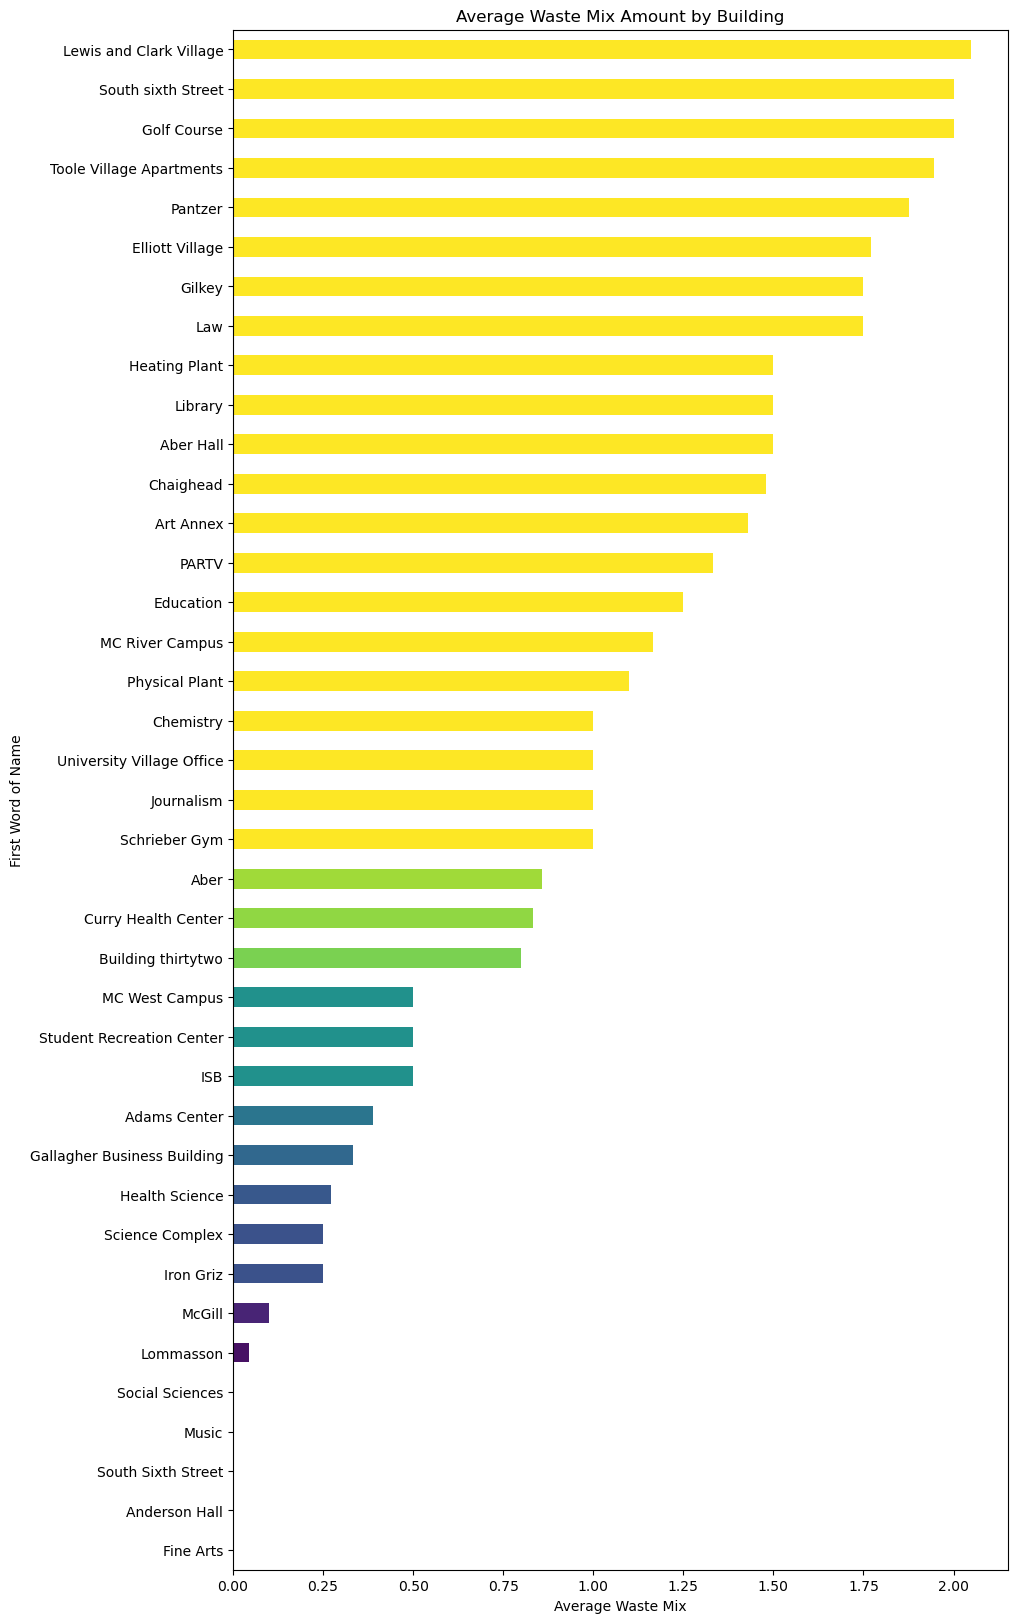

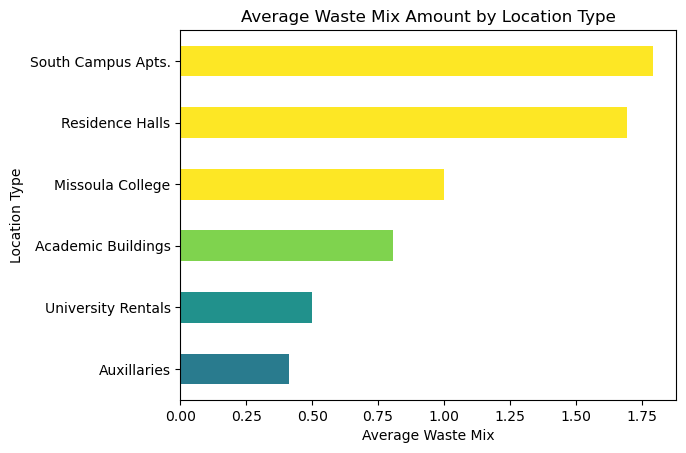

In [126]:
df.groupby('dumpster_name')['waste_mix'].mean().sort_values().plot(kind='barh', figsize=(10,30), color=plt.cm.viridis(df.groupby('dumpster_name')['waste_mix'].mean().sort_values()))
plt.title('Average Waste Mix Amount by Dumpster')
plt.xlabel('Average Waste Mix')
plt.ylabel('Dumpster Name')
plt.show()

df.groupby('short_name')['waste_mix'].mean().sort_values().plot(kind='barh', figsize=(10,20), color=plt.cm.viridis(df.groupby('short_name')['waste_mix'].mean().sort_values()))
plt.title('Average Waste Mix Amount by Building')
plt.xlabel('Average Waste Mix')
plt.ylabel('First Word of Name')
plt.show()

df.groupby('Location Type')['waste_mix'].mean().sort_values().plot(kind='barh', color=plt.cm.viridis(df.groupby('Location Type')['waste_mix'].mean().sort_values()))
plt.title('Average Waste Mix Amount by Location Type')
plt.xlabel('Average Waste Mix')
plt.ylabel('Location Type')
plt.show()
